In [3]:
import pandas as pd
import numpy as np
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from seaborn import pairplot, heatmap

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0) 


In [4]:
#create classifiers
lr = LogisticRegression()
svc = LinearSVC(C =1.0)
rfc = RandomForestClassifier(n_estimators = 100)

In [5]:
df=pd.read_csv('MFG10YearTerminationData.csv')

In [6]:
df.head(10)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


#### Create a pivot table that shows the employee ID with the max status year thats avavaliable in the data set

In [7]:
max_year = df.pivot_table(index=['EmployeeID'], values=['recorddate_key'], aggfunc='max')

In [8]:
max_year.head(20)

,recorddate_key
EmployeeID,
1318,12/31/2015 0:00
1319,12/31/2015 0:00
1320,12/31/2015 0:00
1321,12/31/2015 0:00
1322,12/31/2015 0:00
1323,12/31/2015 0:00
1325,12/31/2015 0:00
1328,12/31/2015 0:00
1329,12/31/2015 0:00


### did a inner join between the max status year table and df table to get the most recent data for each employee

In [9]:
final_table = df.merge(max_year, on=['EmployeeID','recorddate_key'], how='inner')

In [10]:
final_table.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
1,1319,12/31/2015 0:00,1/3/1957,8/28/1989,1/1/1900,58,26,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
2,1320,12/31/2015 0:00,1/2/1955,8/28/1989,1/1/1900,60,26,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
3,1321,12/31/2015 0:00,1/2/1959,8/28/1989,1/1/1900,56,26,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
4,1322,12/31/2015 0:00,1/9/1958,8/31/1989,1/1/1900,57,26,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


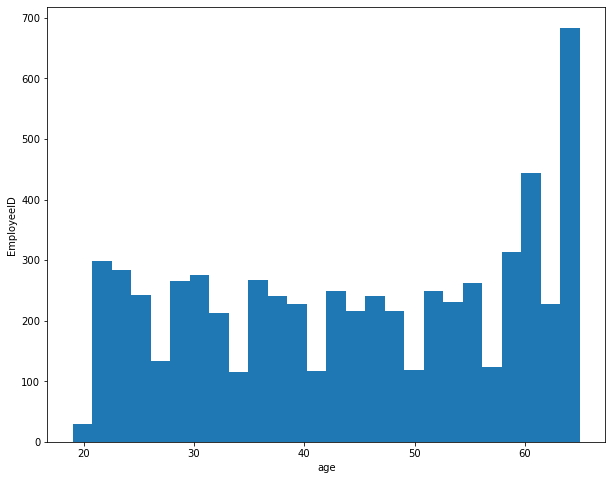

In [11]:
plt.figure()
plt.hist(final_table['age'], bins=26)
plt.xlabel('age')
plt.ylabel('EmployeeID')
plt.show()

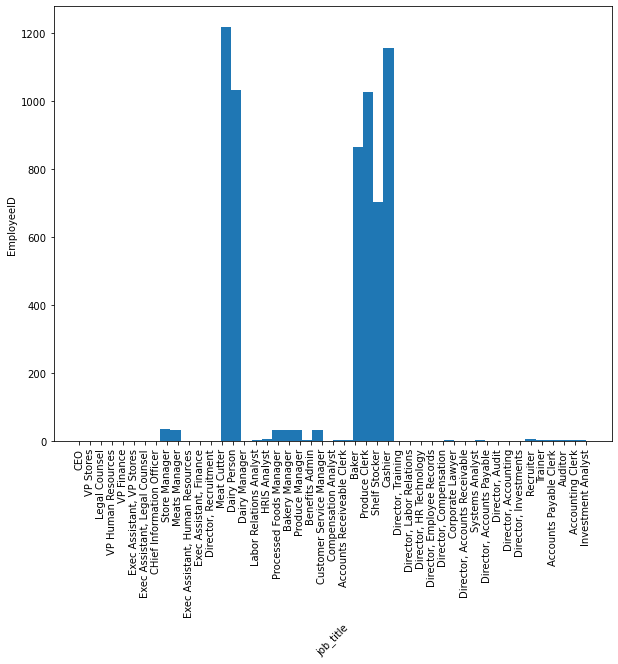

In [12]:
plt.figure()
plt.hist(final_table['job_title'], bins=50)
plt.xlabel('job_title', rotation =45)
plt.xticks(rotation='90')
plt.ylabel('EmployeeID')
plt.show()

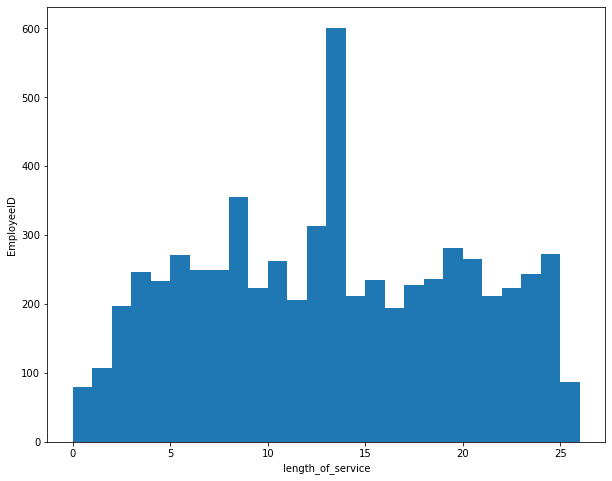

In [13]:
plt.figure()
plt.hist(final_table['length_of_service'], bins=26)
plt.xlabel('length_of_service')
plt.ylabel('EmployeeID')
plt.show()

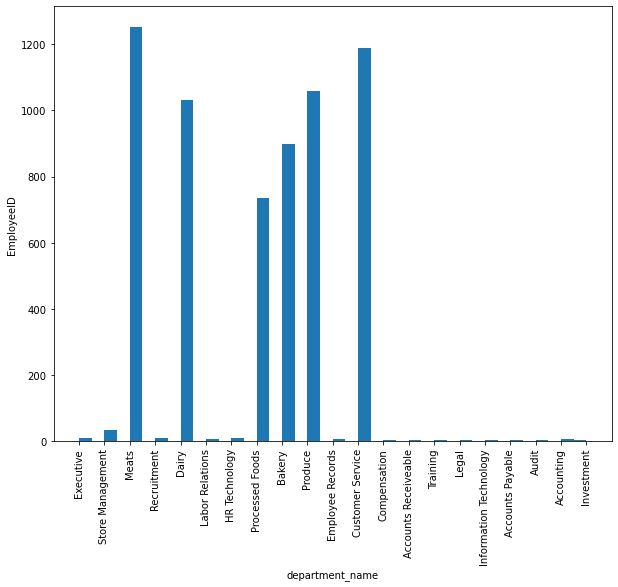

In [14]:
plt.figure()
plt.hist(final_table['department_name'], bins=40)
plt.xlabel('department_name')
plt.xticks(rotation='90')
plt.ylabel('EmployeeID')
plt.show()

In [15]:
final_table[final_table['EmployeeID'] == 1318]

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


### Create Dummy Variables

In [16]:
 EMP = final_table[[ 'length_of_service','city_name', 'department_name','job_title','store_name','gender_short','BUSINESS_UNIT','STATUS' ]]

In [17]:
EMP = pd.get_dummies(EMP, columns=[ 'length_of_service','city_name', 'department_name','job_title','store_name','gender_short','BUSINESS_UNIT','STATUS'], drop_first=True)

In [36]:
pd.set_option('display.max_columns', None)
EMP.head()

,length_of_service_1,length_of_service_2,length_of_service_3,length_of_service_4,length_of_service_5,length_of_service_6,length_of_service_7,length_of_service_8,length_of_service_9,length_of_service_10,length_of_service_11,length_of_service_12,length_of_service_13,length_of_service_14,length_of_service_15,length_of_service_16,length_of_service_17,length_of_service_18,length_of_service_19,length_of_service_20,length_of_service_21,length_of_service_22,length_of_service_23,length_of_service_24,length_of_service_25,length_of_service_26,city_name_Aldergrove,city_name_Bella Bella,city_name_Blue River,city_name_Burnaby,city_name_Chilliwack,city_name_Cortes Island,city_name_Cranbrook,city_name_Dawson Creek,city_name_Dease Lake,city_name_Fort Nelson,city_name_Fort St John,city_name_Grand Forks,city_name_Haney,city_name_Kamloops,city_name_Kelowna,city_name_Langley,city_name_Nanaimo,city_name_Nelson,city_name_New Westminister,city_name_New Westminster,city_name_North Vancouver,city_name_Ocean Falls,city_name_Pitt Meadows,city_name_Port Coquitlam,city_name_Prince George,city_name_Princeton,city_name_Quesnel,city_name_Richmond,city_name_Squamish,city_name_Surrey,city_name_Terrace,city_name_Trail,city_name_Valemount,city_name_Vancouver,city_name_Vernon,city_name_Victoria,city_name_West Vancouver,city_name_White Rock,city_name_Williams Lake,department_name_Accounts Payable,department_name_Accounts Receiveable,department_name_Audit,department_name_Bakery,department_name_Compensation,department_name_Customer Service,department_name_Dairy,department_name_Employee Records,department_name_Executive,department_name_HR Technology,department_name_Information Technology,department_name_Investment,department_name_Labor Relations,department_name_Legal,department_name_Meats,department_name_Processed Foods,department_name_Produce,department_name_Recruitment,department_name_Store Management,department_name_Training,job_title_Accounts Payable Clerk,job_title_Accounts Receiveable Clerk,job_title_Auditor,job_title_Baker,job_title_Bakery Manager,job_title_Benefits Admin,job_title_CEO,job_title_CHief Information Officer,job_title_Cashier,job_title_Compensation Analyst,job_title_Corporate Lawyer,job_title_Customer Service Manager,job_title_Dairy Manager,job_title_Dairy Person,"job_title_Director, Accounting","job_title_Director, Accounts Payable","job_title_Director, Accounts Receivable","job_title_Director, Audit","job_title_Director, Compensation","job_title_Director, Employee Records","job_title_Director, HR Technology","job_title_Director, Investments","job_title_Director, Labor Relations","job_title_Director, Recruitment","job_title_Director, Training","job_title_Exec Assistant, Finance","job_title_Exec Assistant, Human Resources","job_title_Exec Assistant, Legal Counsel","job_title_Exec Assistant, VP Stores",job_title_HRIS Analyst,job_title_Investment Analyst,job_title_Labor Relations Analyst,job_title_Legal Counsel,job_title_Meat Cutter,job_title_Meats Manager,job_title_Processed Foods Manager,job_title_Produce Clerk,job_title_Produce Manager,job_title_Recruiter,job_title_Shelf Stocker,job_title_Store Manager,job_title_Systems Analyst,job_title_Trainer,job_title_VP Finance,job_title_VP Human Resources,job_title_VP Stores,store_name_2,store_name_3,store_name_4,store_name_5,store_name_6,store_name_7,store_name_8,store_name_9,store_name_10,store_name_11,store_name_12,store_name_13,store_name_14,store_name_15,store_name_16,store_name_17,store_name_18,store_name_19,store_name_20,store_name_21,store_name_22,store_name_23,store_name_24,store_name_25,store_name_26,store_name_27,store_name_28,store_name_29,store_name_30,store_name_31,store_name_32,store_name_33,store_name_34,store_name_35,store_name_36,store_name_37,store_name_38,store_name_39,store_name_40,store_name_41,store_name_42,store_name_43,store_name_44,store_name_45,store_name_46,gender_short_M,BUSINESS_UNIT_STORES,STATUS_TERMINATED
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [19]:
EMP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6284 entries, 0 to 6283
Columns: 179 entries, length_of_service_1 to STATUS_TERMINATED
dtypes: uint8(179)
memory usage: 1.1 MB


In [20]:
EMP.shape

(6284, 179)

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split (EMP, test_size=0.2)

In [22]:
train.shape

(5027, 179)

In [23]:
test.shape

(1257, 179)

In [24]:
train.head()

,length_of_service_1,length_of_service_2,length_of_service_3,length_of_service_4,length_of_service_5,length_of_service_6,length_of_service_7,length_of_service_8,length_of_service_9,length_of_service_10,...,store_name_40,store_name_41,store_name_42,store_name_43,store_name_44,store_name_45,store_name_46,gender_short_M,BUSINESS_UNIT_STORES,STATUS_TERMINATED
3774,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3804,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4655,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5903,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1


In [30]:
train_feat = train.drop('STATUS_TERMINATED', axis=1)
train_targ = train['STATUS_TERMINATED']
test_feat = test.drop('STATUS_TERMINATED', axis=1)
test_targ = test['STATUS_TERMINATED']

In [61]:
train_feat.shape


(5027, 178)

In [32]:
train_targ.shape

(5027,)

#### LogisticRegression

In [62]:
lr.fit(train_feat, train_targ)

LogisticRegression()

In [63]:
lr.score(train_feat, train_targ)

0.9417147404018301

In [64]:
lr.score(test_feat, test_targ)

0.9387430389817024

In [65]:
# everything we got right and everything we got wrong 

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(lr.predict(train_feat), train_targ)

array([[4261,  229],
       [  64,  473]], dtype=int64)

In [68]:
# 4261 True Postive 229 False postive
# 229 False Neg 64 true neg

In [69]:
confusion_matrix(lr.predict(test_feat), test_targ)

array([[1068,   58],
       [  19,  112]], dtype=int64)

#### Random Forest Classifier

In [70]:
rfc.fit(train_feat, train_targ)

RandomForestClassifier()

In [71]:
rfc.score(train_feat, train_targ)

0.9811020489357469

In [72]:
rfc.score(test_feat, test_targ)

0.9443118536197295

In [73]:
confusion_matrix(rfc.predict(train_feat), train_targ)

array([[4283,   53],
       [  42,  649]], dtype=int64)

In [74]:
confusion_matrix(rfc.predict(test_feat), test_targ)

array([[1061,   44],
       [  26,  126]], dtype=int64)

#### Liner SVC Model

In [75]:
svc.fit(train_feat, train_targ)

LinearSVC()

In [76]:
svc.score(train_feat, train_targ)

0.939924408195743

In [77]:
svc.score(test_feat, test_targ)

0.9379474940334129

In [78]:
confusion_matrix(svc.predict(train_feat), train_targ)

array([[4241,  218],
       [  84,  484]], dtype=int64)

In [79]:
confusion_matrix(svc.predict(test_feat), test_targ)

array([[1062,   53],
       [  25,  117]], dtype=int64)